In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('./san-francisco-crimes-2008-2022.csv').drop(['Unnamed: 0'], axis=1)

In [4]:
df

Category        Date  Year   Latitude   Longitude  Month  \
0              LARCENY/THEFT  2013-12-14  2013  37.783767 -122.488768     12   
1              VEHICLE THEFT  2015-09-13  2015  37.783767 -122.488768      9   
2              LARCENY/THEFT  2009-04-22  2009  37.783575 -122.493014      4   
3             SUSPICIOUS OCC  2008-01-17  2008  37.783575 -122.493014      1   
4              LARCENY/THEFT  2009-08-31  2009  37.783575 -122.493014      8   
...                      ...         ...   ...        ...         ...    ...   
1776233  Other Miscellaneous  2022-05-25  2022  37.740535 -122.458905      5   
1776234  Motor Vehicle Theft  2021-07-27  2021  37.740535 -122.458905      7   
1776235      Weapons Offense  2022-07-03  2022  37.740535 -122.458905      7   
1776236    Recovered Vehicle  2018-01-27  2018  37.740535 -122.458905      1   
1776237             Burglary  2021-02-16  2021  37.740535 -122.458905      2   

         Day  Time  DayOfWeek  \
0         14    18   Saturday   
1         13    21     Sunday   
2         22    15  Wednesday   
3         17    16   Thursday   
4         31    11     Monday   
...      ...   ...        ...   
1776233   25    22  Wednesday   
1776234   27    20    Tuesday   
1776235    3    23     Sunday   
1776236   27    15   Saturday   
1776237   16     4    Tuesday   

                                                  geometry  
0        POLYGON ((-122.49345526799993 37.7835181710000...  
1        POLYGON ((-122.49345526799993 37.7835181710000...  
2        POLYGON ((-122.49345526799993 37.7835181710000...  
3        POLYGON ((-122.49345526799993 37.7835181710000...  
4        POLYGON ((-122.49345526799993 37.7835181710000...  
...                                                    ...  
1776233  POLYGON ((-122.45890466499992 37.7405352210000...  
1776234  POLYGON ((-122.45890466499992 37.7405352210000...  
1776235  POLYGON ((-122.45890466499992 37.7405352210000...  
1776236  POLYGON ((-122.45890466499992 37.7405352210000...  
1776237  POLYGON ((-122.45890466499992 37.7405352210000...  

[1776238 rows x 10 columns]

# Seaborn

<Axes: title={'center': 'Número de crimes ao passar dos dias'}, xlabel='Dias', ylabel='Crimes'>

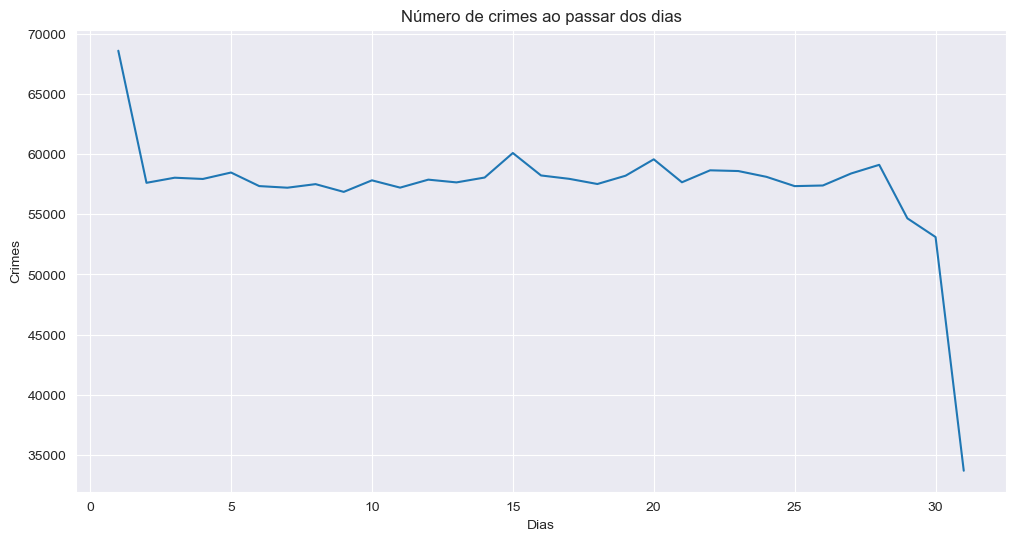

In [6]:
plt.figure(figsize=[12, 6])
plt.title('Número de crimes ao passar dos dias')
plt.ylabel('Crimes')
plt.xlabel('Dias')
sns.lineplot(x=df['Day'].value_counts().index,y=df['Day'].value_counts().values)

<Axes: title={'center': 'Número de crimes ao passar dos meses'}, xlabel='Mês', ylabel='Crimes'>

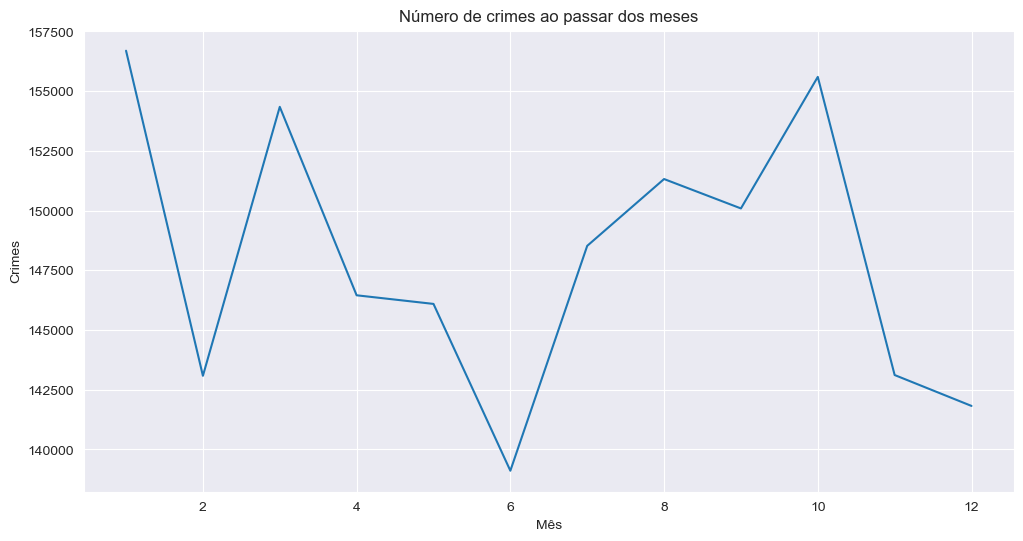

In [7]:
plt.figure(figsize=[12, 6])
plt.title('Número de crimes ao passar dos meses')
plt.ylabel('Crimes')
plt.xlabel('Mês')
sns.lineplot(x=df['Month'].value_counts().index,y=df['Month'].value_counts().values)

<Axes: title={'center': 'Número de crimes ao passar dos anos'}, xlabel='Ano', ylabel='Crimes'>

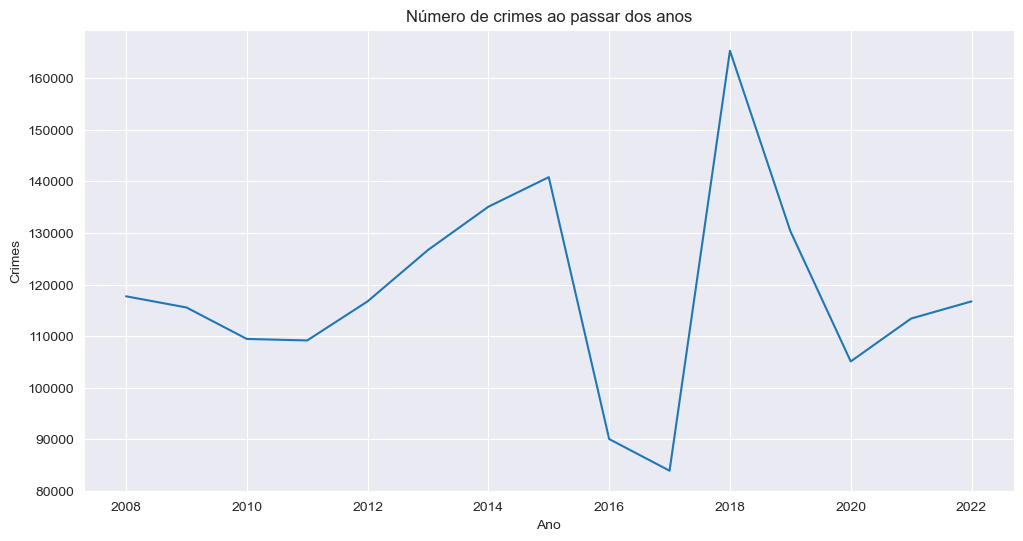

In [8]:
plt.figure(figsize=[12, 6])
plt.title('Número de crimes ao passar dos anos')
plt.ylabel('Crimes')
plt.xlabel('Ano')
sns.lineplot(x=df['Year'].value_counts().index,y=df['Year'].value_counts().values)

<Axes: title={'center': 'Número de crimes ao passar das horas'}, xlabel='Horas', ylabel='Crimes'>

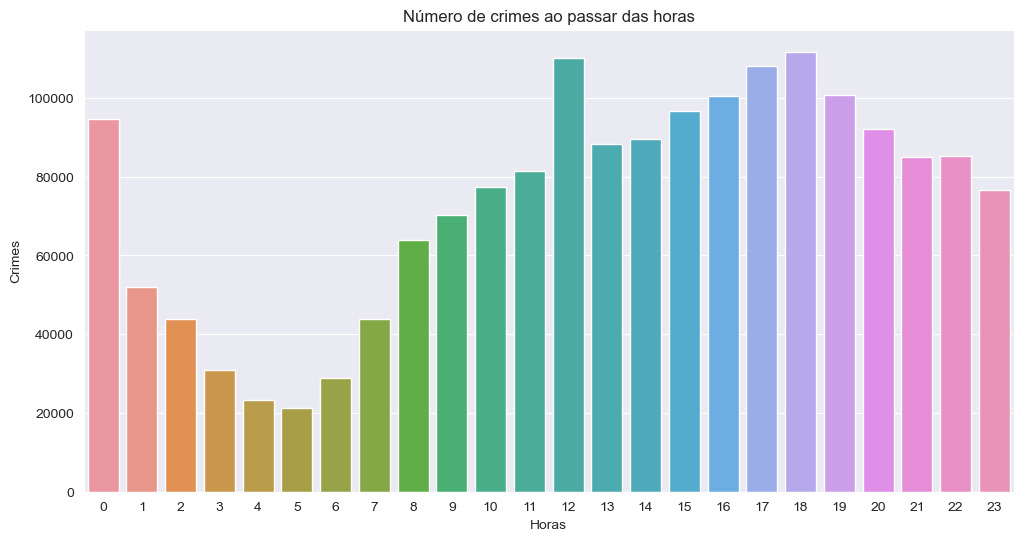

In [9]:
plt.figure(figsize=[12, 6])
plt.title('Número de crimes ao passar das horas')
plt.ylabel('Crimes')
plt.xlabel('Horas')
sns.barplot(x=df['Time'].value_counts().index,y=df['Time'].value_counts().values)

<Axes: title={'center': 'Top 5 crimes'}, xlabel='Crimes'>

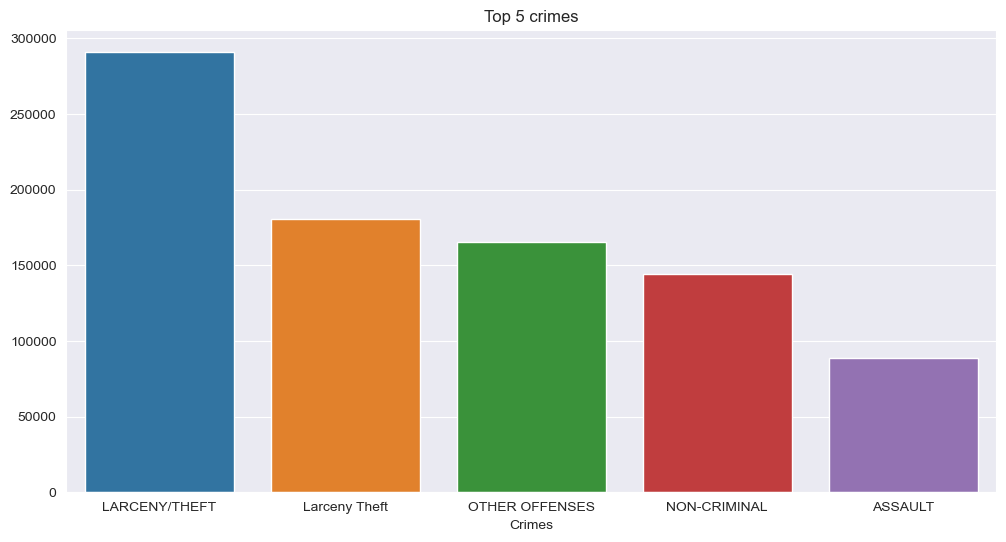

In [10]:
plt.figure(figsize=[12, 6])
plt.title('Top 5 crimes')
plt.ylabel('')
plt.xlabel('Crimes')
sns.barplot(x= df['Category'].value_counts().index[:5], y = df['Category'].value_counts().values[0:5])

In [11]:
dias = {
    'Sunday':0,
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6
}

contagemDias = df['DayOfWeek'].value_counts().rename(index=dias).sort_index()
contagemDias

0    238963
1    247316
2    249750
3    259200
4    251737
5    270915
6    258357
Name: DayOfWeek, dtype: int64

<Axes: title={'center': 'Número de crimes por dia da semana (0 como domingo)'}, xlabel='Dias', ylabel='Crimes'>

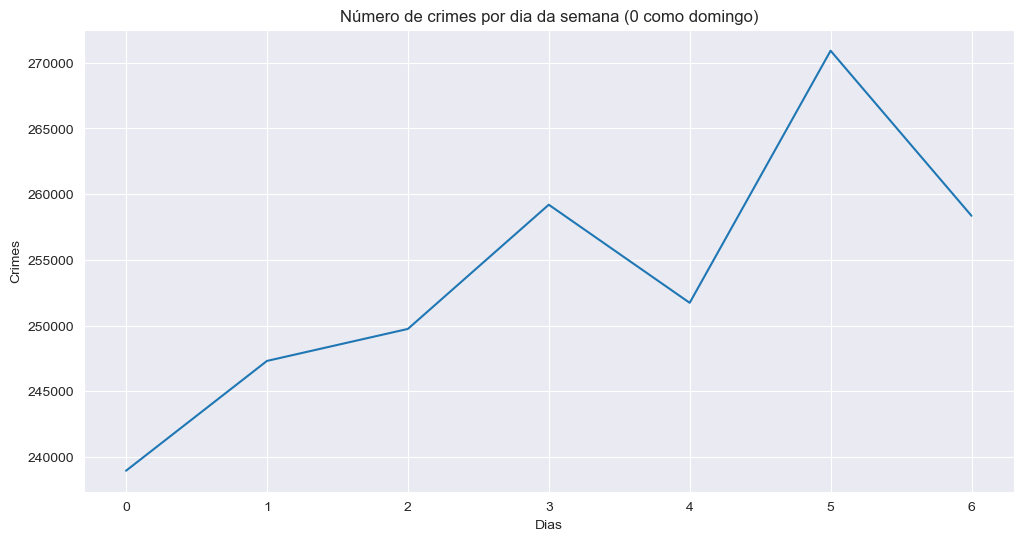

In [12]:
plt.figure(figsize=[12, 6])
plt.title('Número de crimes por dia da semana (0 como domingo)')
plt.ylabel('Crimes')
plt.xlabel('Dias')
sns.lineplot(x=contagemDias.index,y=contagemDias.values)

In [13]:
newDf = df.filter(['Year','Month','Category'], axis=1)
newDfff = pd.DataFrame(columns= ['Year', 'Month', 'Count'])
for i in range(2008, 2023):
  index = df.index
  index = index[df['Year'] == i].tolist()
  train = newDf.iloc[index, :]
  
  newDff = pd.DataFrame(columns= ['Year', 'Month', 'Count'])
  newDff['Year'] = np.ones(12) * i
  newDff['Month'] = train['Month'].value_counts().index
  newDff['Count'] = train['Month'].value_counts().values
  newDfff = pd.concat([newDff, newDfff])

tabela_pivot = newDfff.pivot_table(index='Year', columns='Month', values = 'Count')
tabela_pivot

Month        1        2        3        4        5        6        7   \
Year                                                                    
2008.0   9902.0   9106.0  10285.0   9586.0   9916.0   9014.0  10362.0   
2009.0   9863.0   8819.0  10392.0   9960.0   9211.0   8571.0   9565.0   
2010.0   9291.0   8428.0   8987.0   8527.0   9505.0   8927.0   9112.0   
2011.0   9460.0   8170.0   9444.0   9119.0   9410.0   8940.0   8965.0   
2012.0   9592.0   8990.0   9478.0   9229.0   9847.0   9185.0   9618.0   
2013.0  10490.0   9698.0  10711.0  10311.0  10563.0  10255.0  10832.0   
2014.0  11557.0  10241.0  11509.0  11108.0  10999.0  10682.0  11438.0   
2015.0  12239.0  11086.0  12583.0  11644.0  12482.0  11958.0  12040.0   
2016.0   7044.0   8834.0   9055.0   8043.0   6966.0   6358.0   7192.0   
2017.0   6690.0   6419.0   7271.0   6170.0   6228.0   6155.0   6769.0   
2018.0  20378.0  16932.0  17794.0  17373.0  13169.0  10885.0  12102.0   
2019.0  10713.0   9505.0  10276.0  10429.0  10776.0  10600.0  11456.0   
2020.0  10951.0  10133.0   8429.0   7183.0   8400.0   8120.0   8800.0   
2021.0   9247.0   8235.0   8455.0   8379.0   9390.0   9682.0   9833.0   
2022.0   9277.0   8486.0   9675.0   9392.0   9230.0   9775.0  10439.0   

Month        8        9        10       11       12  
Year                                                 
2008.0   9639.0  10059.0  10774.0   9821.0   9263.0  
2009.0  10798.0  10207.0   9975.0   9364.0   8841.0  
2010.0   9599.0   9765.0   9691.0   8830.0   8799.0  
2011.0   9223.0   9210.0   9405.0   8730.0   9097.0  
2012.0  10209.0   9927.0  10993.0   9952.0   9728.0  
2013.0  11307.0  11548.0  11466.0  10117.0   9407.0  
2014.0  12125.0  11252.0  12110.0  10963.0  11104.0  
2015.0  12374.0  11605.0  11795.0  10774.0  10241.0  
2016.0   6644.0   8255.0   7359.0   6828.0   7485.0  
2017.0   6838.0   6833.0   8510.0   7944.0   8097.0  
2018.0  12202.0  11248.0  11727.0  10611.0  10903.0  
2019.0  11903.0  11352.0  12057.0  10627.0  10681.0  
2020.0   8575.0   8142.0   8621.0   8754.0   8995.0  
2021.0   9599.0   9963.0  10657.0  10246.0   9730.0  
2022.0  10286.0  10724.0  10458.0   9553.0   9449.0

<ErrorbarContainer object of 3 artists>

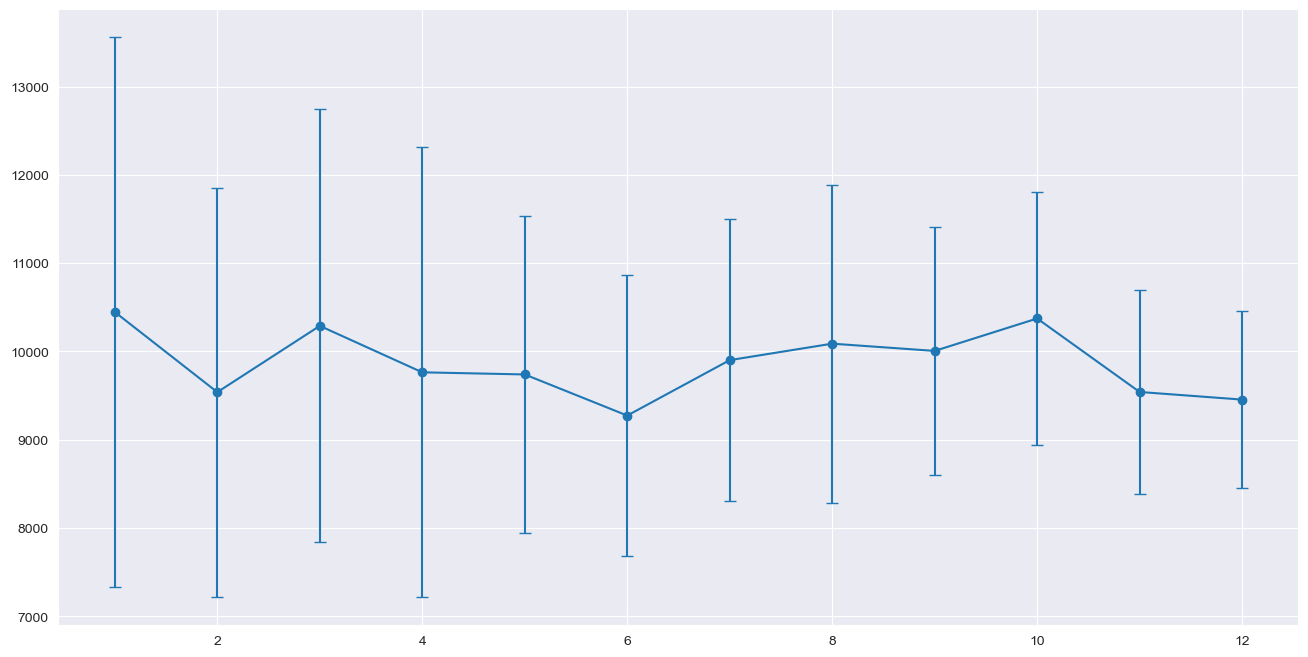

In [14]:
plt.figure(figsize=(16,8))                                                  
plt.errorbar(x=tabela_pivot.mean(axis=0).index, y=tabela_pivot.mean(axis=0).values, yerr=tabela_pivot.std(axis=0), fmt='-o', capsize= 4.0)

# Folium e GeoPandas

In [15]:
pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 21.9/21.9 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 5.1/5.1 MB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:
import geopandas as gpd

In [19]:
from shapely.geometry import Point

In [23]:
mapa = gpd.read_file('./SF Find Neighborhoods.zip (Unzipped Files)/geo_export_1e0a72d7-85f1-4091-924b-eb8389c0d1d7.shp')
mapa.crs = 'EPSG:7131'
mapa

link  \
0    http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...   
1                                                  NaN   
2                    http://www.nps.gov/prsf/index.htm   
3                                                  NaN   
4    http://www.sfgate.com/neighborhoods/sf/innerri...   
..                                                 ...   
112  http://en.wikipedia.org/wiki/Corona_Heights,_S...   
113        http://en.wikipedia.org/wiki/Haight-Ashbury   
114  http://en.wikipedia.org/wiki/Eureka_Valley,_Sa...   
115  http://en.wikipedia.org/wiki/St._Francis_Wood,...   
116  http://en.wikipedia.org/wiki/Neighborhoods_in_...   

                       name                                           geometry  
0                  Seacliff  POLYGON ((-122.493 37.784, -122.494 37.787, -1...  
1               Lake Street  POLYGON ((-122.487 37.784, -122.487 37.786, -1...  
2    Presidio National Park  POLYGON ((-122.478 37.811, -122.477 37.811, -1...  
3          Presidio Terrace  POLYGON ((-122.472 37.787, -122.471 37.788, -1...  
4            Inner Richmond  POLYGON ((-122.473 37.786, -122.467 37.787, -1...  
..                      ...                                                ...  
112          Corona Heights  POLYGON ((-122.435 37.763, -122.435 37.763, -1...  
113         Ashbury Heights  POLYGON ((-122.452 37.761, -122.452 37.762, -1...  
114           Eureka Valley  POLYGON ((-122.437 37.762, -122.437 37.759, -1...  
115        St. Francis Wood  POLYGON ((-122.472 37.735, -122.468 37.737, -1...  
116         Sherwood Forest  POLYGON ((-122.459 37.741, -122.459 37.741, -1...  

[117 rows x 3 columns]

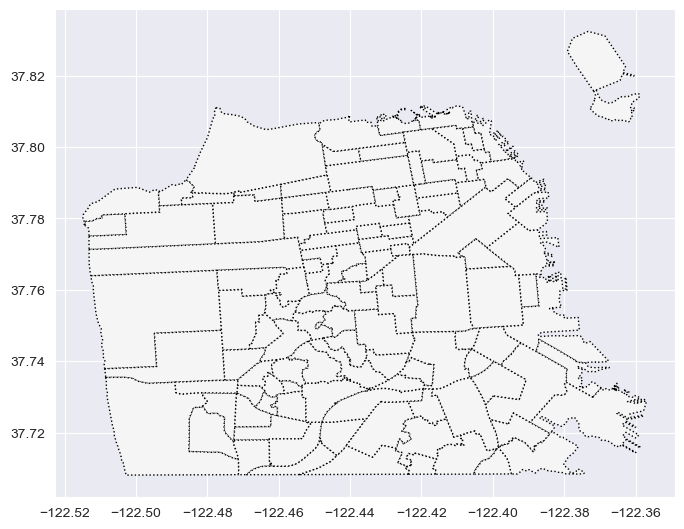

In [24]:
ax = mapa.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')

In [26]:
conda install folium

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Geniar\anaconda3

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.6.0               |  py310haa95532_0          44 KB
    folium-0.14.0              |  py310haa95532_0         114 KB
    ------------------------------------------------------------
                                           Total:         158 KB

The following NEW packages will be INSTALLED:

  branca             pkgs/main/win-64::branca-0.6.0-py310haa95532_0 
  folium             pkgs/main/win-64::folium-0.14.0-py310haa95532_0 




folium-0.14.0        | 114 KB    |            |   0% 

branca-0.6.0         | 44 KB     |            |   0% 

branca-0.6.0         | 44 KB     | ###6       |  37% 

branca-0.6.0         | 44 KB     | ########## | 100% 
folium-0.14.0        | 114 KB    |

In [27]:
import folium
from folium.plugins import HeatMap, MarkerCluster

In [28]:
mapa1 = folium.Map(location = [37.76826443174238, -122.42593014802819], tiles='stamentoner',zoom_start= 12.4)

In [29]:
mapa1

In [ ]:
### separando para consumir menos memória e obter a visualização ###

In [30]:
df['Year'].value_counts()

2018    165324
2015    140821
2014    135088
2019    130375
2013    126705
2008    117727
2012    116748
2022    116744
2009    115566
2021    113416
2010    109461
2011    109173
2020    105103
2016     90063
2017     83924
Name: Year, dtype: int64

In [31]:
df2017 = df.loc[df['Year'].isin([2017])].reset_index().drop(['index'], axis = 1)
df2017_12 = df2017.loc[df['Month'].isin([12])].reset_index().drop(['index'], axis = 1)

In [32]:
df2017_12.shape

(6743, 10)

In [33]:
HeatMap(
    data = df2017_12[['Latitude', 'Longitude']],
).add_to(mapa1)

In [34]:
mapa1

In [35]:
mapa2 = folium.Map(location = [37.756322095158, -122.4437824835378], tiles='stamentoner',zoom_start= 12.4)

In [36]:
for i in range(len(df2017_12)):
  folium.Circle(
      location = [df2017_12.loc[i].Latitude, df2017_12.loc[i].Longitude],
      radius= 10,
      color = 'darkred'
  ).add_to(mapa2)

In [37]:
mapa2

In [39]:
mapa3 = folium.Map(location = [37.756322095158, -122.4437824835378], tiles='stamentoner',zoom_start= 12.4)

In [40]:
mc = MarkerCluster()

for index, row in df2017_12.iterrows():
  mc.add_child(folium.Marker([row['Latitude'], row['Longitude']]))
mapa3.add_child(mc)

Text(0, 0.5, 'Latitude')

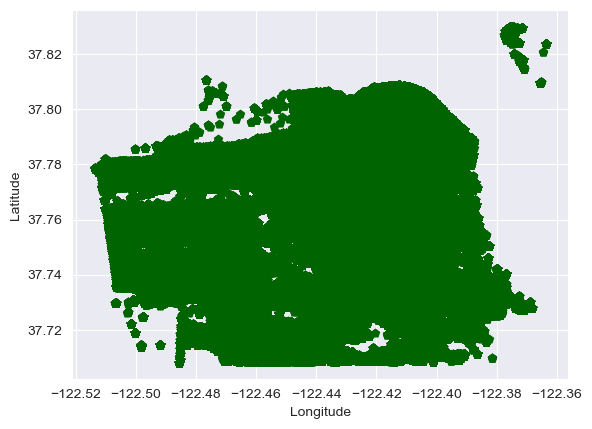

In [41]:
plt.scatter(df.Longitude, df.Latitude,
            c = 'darkgreen', marker = 'p')
plt.xlabel('Longitude')
plt.ylabel('Latitude')